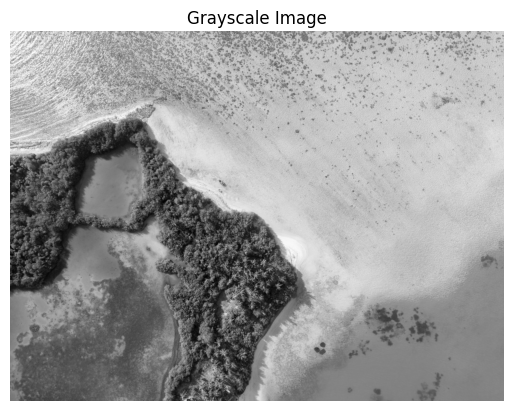

In [1]:
import cv2
import matplotlib.pyplot as plt
# Load the image in color (BGR format)
image = cv2.imread('img.jpg') # Replace with your image path
# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Display the grayscale image using Matplotlib
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off') # Hide axes for a cleaner view
plt.show()

In [6]:
# Manual Thresholding (Built-in)

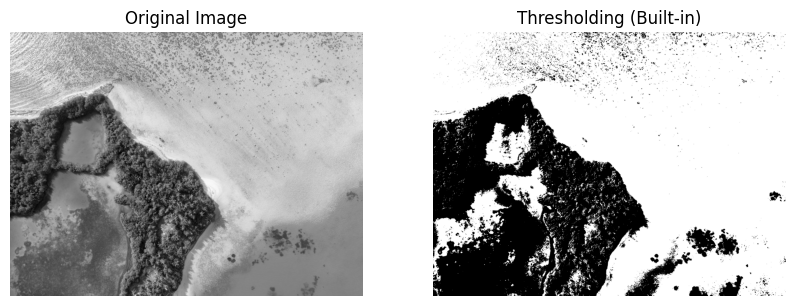

In [8]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('img.jpg', 0)
threshold_value = 127
_, thresh_builtin = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10, 5))
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
# Mean Shift Segmentation Result
plt.subplot(1, 2, 2)
plt.imshow(thresh_builtin, cmap='gray')
plt.title("Thresholding (Built-in)")
plt.axis('off') # Hide axis
plt.show()

In [9]:
# Manual Thresholding (Manual)

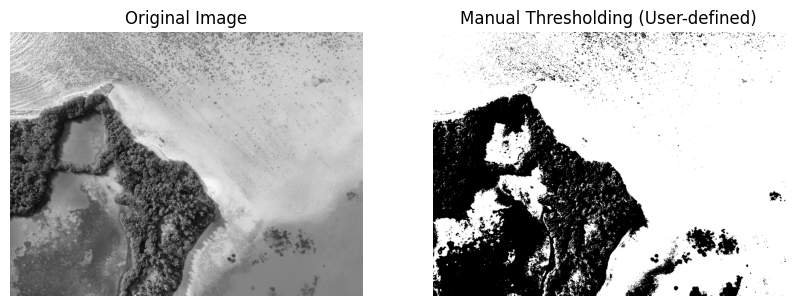

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load an image in grayscale
image = cv2.imread('img.jpg', 0)

# User-defined thresholding function
def threshold_image(image, threshold_value):
    """
    Function to threshold an image based on the provided threshold value.
    Pixels greater than or equal to threshold_value are set to 255 (white),
    others are set to 0 (black).
    """
    # Create an empty image with the same size as the input
    thresh_image = np.zeros_like(image)
    
    # Apply the thresholding logic
    thresh_image[image >= threshold_value] = 255  # Set pixels above threshold to 255
    thresh_image[image < threshold_value] = 0     # Set pixels below threshold to 0
    
    return thresh_image

# Set a threshold value (you can adjust this value)
threshold_value = 127  # Example threshold value

# Apply user-defined thresholding
thresh_manual = threshold_image(image, threshold_value)

# Plot the images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Manual Thresholding Result
plt.subplot(1, 2, 2)
plt.imshow(thresh_manual, cmap='gray')
plt.title("Manual Thresholding (User-defined)")
plt.axis('off')  # Hide axis

# Show the plot
plt.show()


In [ ]:
# K-Means (Manual)

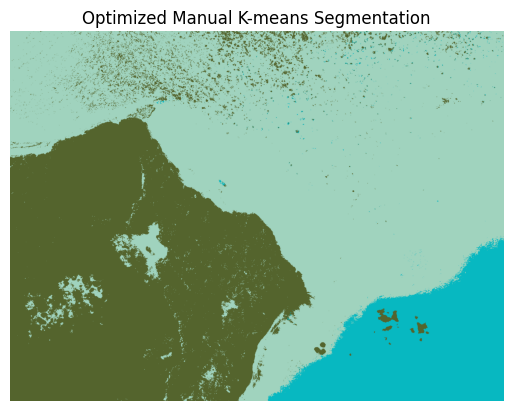

In [12]:
image = cv2.imread('img.jpg')  # Replace with your image path

# Convert the image to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array (each pixel becomes a data point)
pixels = image_rgb.reshape(-1, 3)

# K-means (Optimized) Implementation
def kmeans_manual(pixels, k=3, max_iters=100, tol=1e-4):
    # Randomly initialize centroids
    centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]
    
    # To store the labels (cluster assignments) for each pixel
    labels = np.zeros(pixels.shape[0], dtype=int)
    
    for _ in range(max_iters):
        # Step 1: Assign each pixel to the nearest centroid (vectorized operation)
        distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)
        new_labels = np.argmin(distances, axis=1)
        
        # Step 2: Recompute the centroids by averaging the pixels assigned to each cluster
        new_centroids = np.array([pixels[new_labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence (if centroids do not change significantly)
        if np.all(np.abs(centroids - new_centroids) < tol):
            break
        
        centroids = new_centroids
        labels = new_labels
    
    # Create segmented image based on labels (assign each pixel its centroid's color)
    segmented_image = centroids[labels].reshape(image_rgb.shape)
    
    return segmented_image, labels

# Run optimized K-means
segmented_image_manual, labels_manual = kmeans_manual(pixels, k=3)

# Show the segmented image
plt.imshow(segmented_image_manual.astype(int))
plt.title("Optimized Manual K-means Segmentation")
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# K-Means (Built-in)

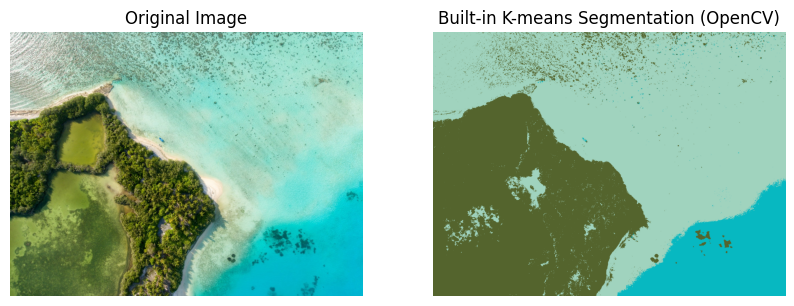

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('img.jpg')  # Replace with your image path

# Convert the image to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array (each pixel becomes a data point)
pixels = image_rgb.reshape(-1, 3)
pixels = np.float32(pixels)

# Define criteria and apply kmeans() from OpenCV
k = 3  # Number of clusters (segments)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Run kmeans using OpenCV
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values
centers = np.uint8(centers)

# Map the labels to center colors
segmented_image_builtin = centers[labels.flatten()]

# Reshape back to the original image shape
segmented_image_builtin = segmented_image_builtin.reshape(image_rgb.shape)

# Plot the images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# K-means Segmentation Result
plt.subplot(1, 2, 2)
plt.imshow(segmented_image_builtin)
plt.title("Built-in K-means Segmentation (OpenCV)")
plt.axis('off')  # Hide axes

# Show the plot
plt.show()


In [ ]:
# Region Growing Segmentation (Built - in)

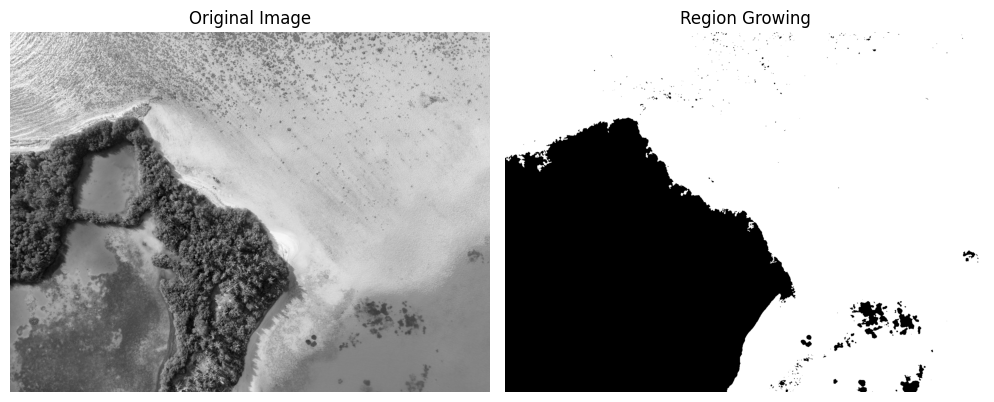

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import flood
from skimage import img_as_ubyte

# Load the grayscale image
image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Blur the image to smooth noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Set seed point and threshold
seed = (120, 100)  # Adjust if needed
threshold = 80

# Apply region growing (flood-fill)
region_grown = flood(blurred, seed, tolerance=threshold)
region_grown = img_as_ubyte(region_grown)

# Optional: Clean small noise using morphological operations
cleaned = cv2.morphologyEx(region_grown, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

# Display results
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Cleaned Region Grown Result
plt.subplot(1, 3, 2)
plt.imshow(cleaned, cmap='gray')
plt.title("Region Growing")
plt.axis('off')

plt.tight_layout()
plt.show()


In [24]:
# Region Growing Segmentation (Manual)

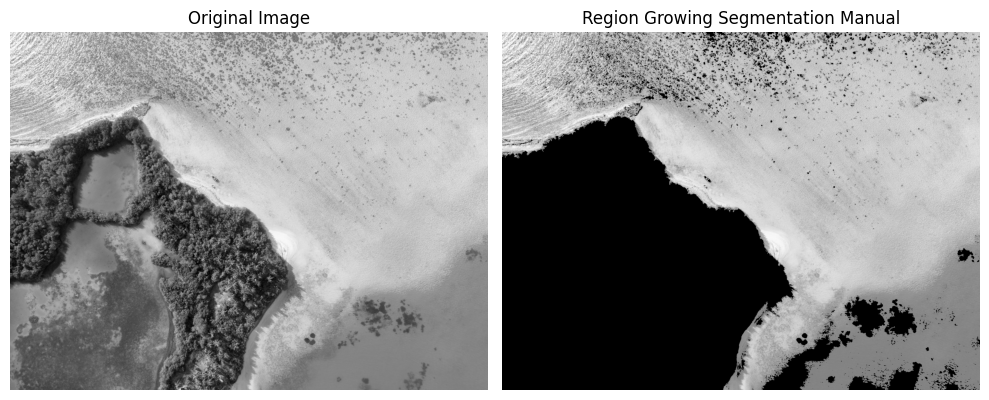

In [37]:
from collections import deque

# Load the uploaded image in grayscale
image_path = "img.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the image path.")
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# Initialize parameters
seed = (120, 100)  # Adjust seed position as needed
threshold = 80   # Intensity threshold for similarity
height, width = image.shape

# Region Growing Function
def region_growing(image, seed, threshold):
    visited = np.zeros_like(image, dtype=bool)  # Track visited pixels
    region = deque([seed])                      # Queue for BFS
    visited[seed] = True
    output = np.zeros_like(image)               # Output segmented image

    # Neighbor directions (4-connectivity)
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    seed_intensity = image[seed]

    while region:
        x, y = region.popleft()
        output[x, y] = image[x, y]
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                if abs(int(image[nx, ny]) - int(seed_intensity)) < threshold:
                    visited[nx, ny] = True
                    region.append((nx, ny))
    return output

# Apply the region-growing function
segmented_image = region_growing(image, seed, threshold)

# Display results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Region Growing Segmentation Result
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Region Growing Segmentation Manual")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Mean Shift Segmentation 

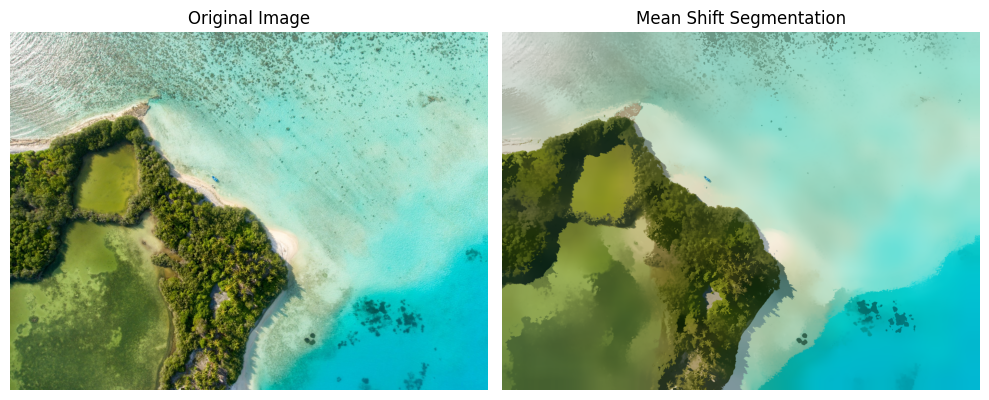

In [41]:
image_path = "img.jpg"
image = cv2.imread(image_path)

# Apply Mean Shift Filtering
spatial_radius = 40        # Filter spatial window size
color_radius = 50          # Filter color window size
max_pyramid_level = 1      # Number of pyramid levels

mean_shift_image = cv2.pyrMeanShiftFiltering(
    image,
    spatial_radius,
    color_radius,
    max_pyramid_level
)

# Display results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Mean Shift Segmentation Result
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mean_shift_image, cv2.COLOR_BGR2RGB))
plt.title("Mean Shift Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Graph Cut Segmentation

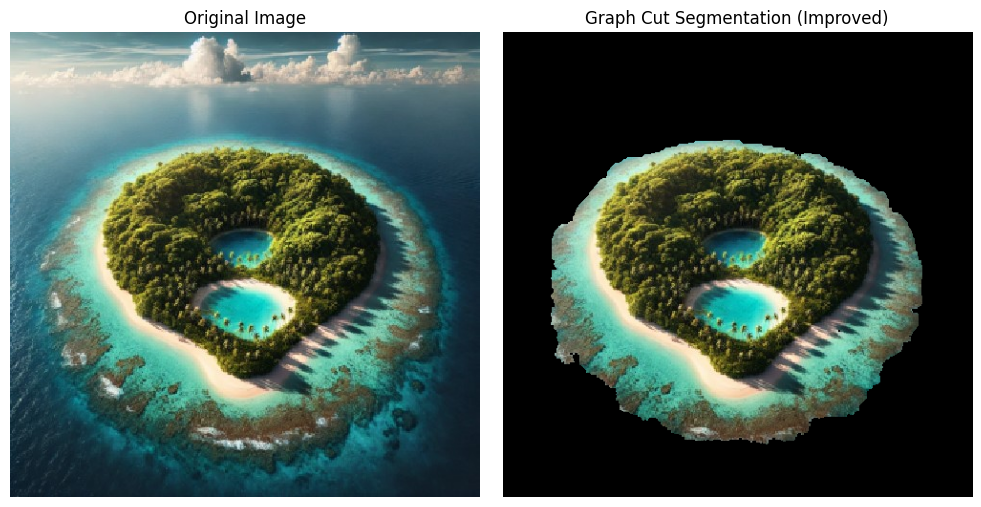

In [42]:
image_path = "island.jpg"
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise ValueError("Error loading image. Please check the file path.")

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define mask (initialize as "probable background")
mask = np.zeros(image.shape[:2], np.uint8)

# Create background and foreground models (used internally by grabCut)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define definite foreground region (rectangle around object of interest)
fgd_rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)  # (x, y, width, height)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, fgd_rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask: 0,2 => background; 1,3 => foreground
mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

# Apply the mask to extract the segmented image
segmented_image = image * mask_final[:, :, np.newaxis]

# Display results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Segmented Image (Graph Cut)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Graph Cut Segmentation (Improved)")
plt.axis("off")

plt.tight_layout()
plt.show()